# GAN-AE
Notebook with an exploration of the input and output of the GAN-AE algorithm
## Input
The pre-processed files have been donwloaded from [this link](https://onedrive.live.com/?authkey=%21APNzARJylhUVxt0&id=2C3CDD05B333D5E2%214457&cid=2C3CDD05B333D5E2). However, one can pre-process the data with the information on [this repository](https://gitlab.cern.ch/idinu/lhc-olympics-preprocessing/-/tree/master)

In [1]:
# Importing the main libraries
import pandas as pd
import numpy as np
import h5py
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib

I'm going to read the pre-processed files for the RnD dataset:

In [2]:
df_bkg = pd.read_hdf('..\data\RnD_bkg_HLF.h5')
df_sig1=pd.read_hdf('..\data\RnD_sig1_HLF.h5')
df_sig2 = pd.read_hdf('..\data\RnD_sig2_HLF.h5')

# All have the same columns
df_bkg.columns

Index(['pt1', 'eta1', 'phi1', 'E1', 'm1', 'nc1', 'nisj1', 'nesj1', '1tau1',
       '2tau1', '3tau1', '32tau1', '21tau1', 'pt2', 'eta2', 'phi2', 'E2', 'm2',
       'nc2', 'nisj2', 'nesj2', '1tau2', '2tau2', '3tau2', '32tau2', '21tau2',
       'eRing0_1', 'eRing1_1', 'eRing2_1', 'eRing3_1', 'eRing4_1', 'eRing5_1',
       'eRing6_1', 'eRing7_1', 'eRing8_1', 'eRing9_1', 'eRing0_2', 'eRing1_2',
       'eRing2_2', 'eRing3_2', 'eRing4_2', 'eRing5_2', 'eRing6_2', 'eRing7_2',
       'eRing8_2', 'eRing9_2', 'mjj', 'nj'],
      dtype='object')

In [3]:
# Let's see the shape
print(df_bkg.shape, df_sig1.shape, df_sig2.shape)

(1000000, 48) (100000, 48) (100000, 48)


According to a [presentation](https://www.dropbox.com/s/mml3xk6c4ecd9qr/lhco_lpc%20-%20Ioan%20Dinu.pdf?dl=0) these are the variables
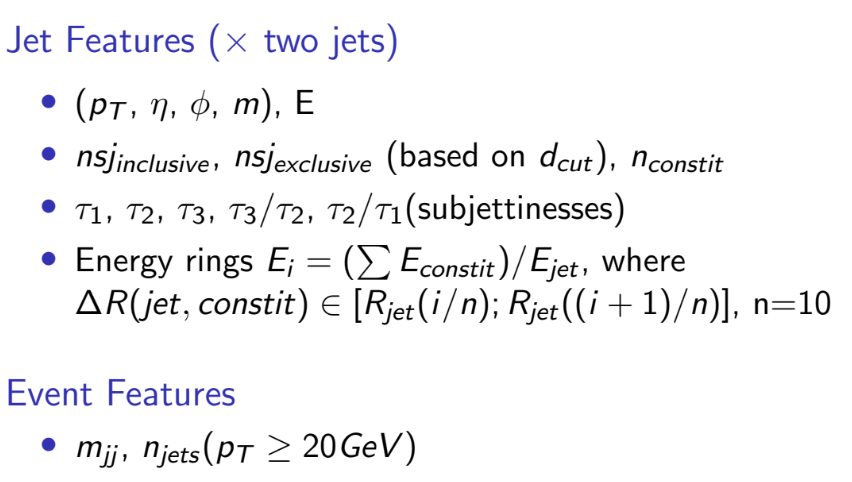 
I'll try to plot some things to understand the data

In [4]:
# I'll add a label variable to plot
df_bkg['label']=0
df_sig1['label']=1
df_sig2['label']=2

df = pd.concat([df_bkg, df_sig1, df_sig2])
df.head()

,pt1,eta1,phi1,E1,m1,nc1,nisj1,nesj1,1tau1,2tau1,...,eRing3_2,eRing4_2,eRing5_2,eRing6_2,eRing7_2,eRing8_2,eRing9_2,mjj,nj,label
0,1229.280156,0.748344,-1.661305,1602.606464,201.754287,48,18,47,0.057577,0.052557,...,0.172148,0.557333,0.213822,0.006539,0.021352,0.015475,0.008714,2537.199353,2,0
1,1607.061714,0.444502,-0.333945,1773.018798,127.116557,47,8,45,0.055647,0.030277,...,0.000000,0.000000,0.000000,0.006010,0.000000,0.000000,0.000000,3079.635449,4,0
2,1368.477022,0.150499,0.139019,1391.016561,139.497466,50,11,49,0.054010,0.031065,...,0.005496,0.002115,0.000000,0.001805,0.006821,0.004289,0.057382,3136.738161,3,0
3,1524.740761,-0.200242,-2.698075,1555.979990,42.044170,20,4,20,0.011612,0.011410,...,0.022763,0.012305,0.006580,0.002522,0.000000,0.002736,0.002287,3105.888967,3,0
4,1396.152785,-0.616216,-0.567546,1673.046873,105.413577,40,14,37,0.018161,0.018878,...,0.045628,0.012304,0.066874,0.042299,0.031090,0.015182,0.019944,2915.201089,4,0


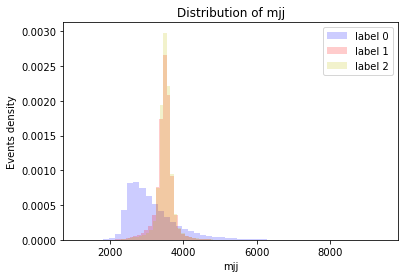

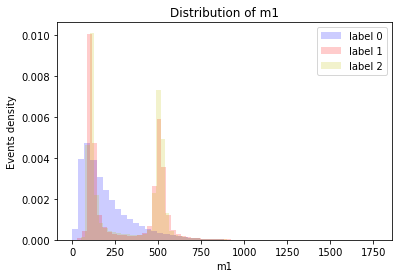

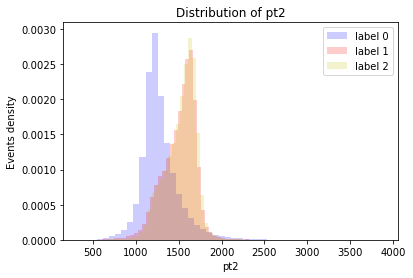

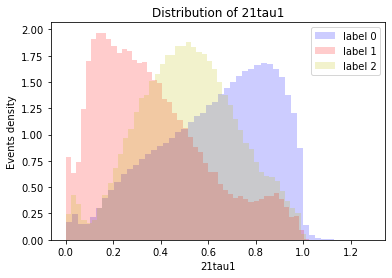

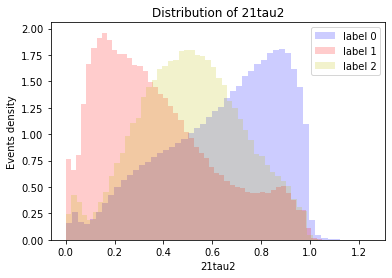

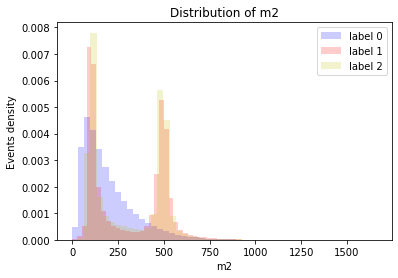

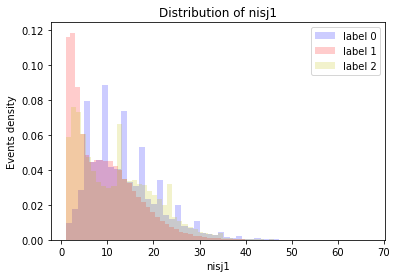

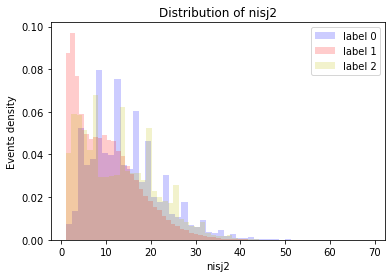

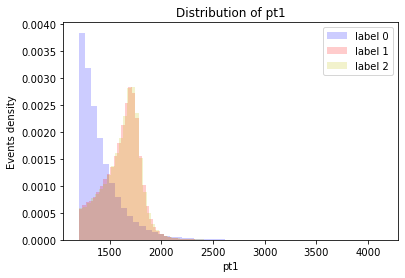

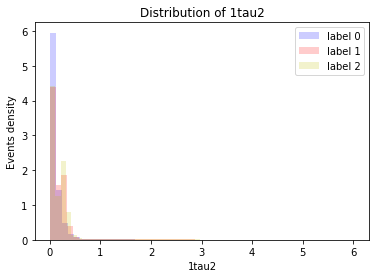

In [5]:
from benchtools.src.plotools import bkg_sig_hist

# I'll list some variables according to 
# the feature importance on the presentation
some_variables = ['mjj', 'm1', 'pt2', '21tau1', '21tau2', 'm2', 
                  'nisj1', 'nisj2', 'pt1', '1tau2']
for variable in some_variables:
    bkg_sig_hist(df, variable, label='label')
    plt.show();

Where it looks orange is because signal 1 (label 1) and signal 2 (label 2) have the same distribution.

## Test set
I'll check the distances 

In [6]:
# Importing ploted metrics
from benchtools.src.metrictools import rejection_plot, inverse_roc_plot, significance_plot, precision_recall_plot

In [7]:
# Reading the distances
dist_bkg = pd.DataFrame(np.array(h5py.File('..\data\RnD_distances.h5', 'r')['bkg']), columns=['y_score'])
dist_sig1 = pd.DataFrame(np.array(h5py.File('..\data\RnD_distances.h5', 'r')['sig1']), columns=['y_score'])
dist_sig2 = pd.DataFrame(np.array(h5py.File('..\data\RnD_distances.h5', 'r')['sig2']), columns=['y_score'])

# Adding labels, 0 for background and 1 for signal
dist_bkg['label']=0
dist_sig1['label']=1
dist_sig2['label']=1

# Getting together each signal with the background
df_sig1 = pd.concat([dist_bkg, dist_sig1])
df_sig2 = pd.concat([dist_bkg, dist_sig2])

### Signal efficiency vs. background rejection

In [8]:
# Listing the values for plotting and comparing
names=['signal 1', 'signal 2']
scores = [df_sig1.loc[:,'y_score'], df_sig2.loc[:,'y_score']]
colors=['darkorange', 'crimson']
labels = [df_sig1.loc[:,'label'], df_sig2.loc[:,'label']]

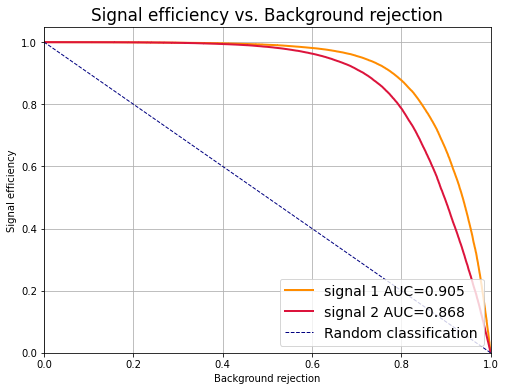

In [9]:
rejection_plot(names=names, labels=labels, probs=scores, colors=colors)
plt.show()

This agrees with the obtained result from the training:
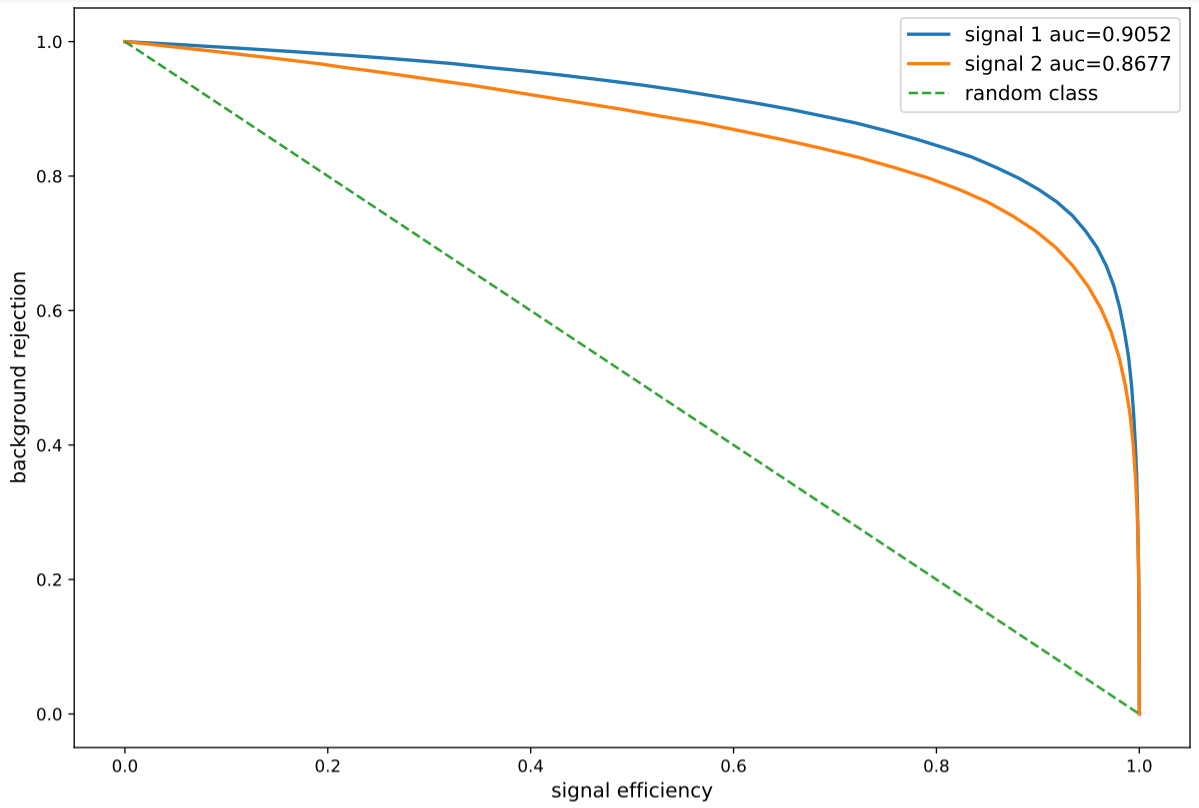

### Inverse ROC

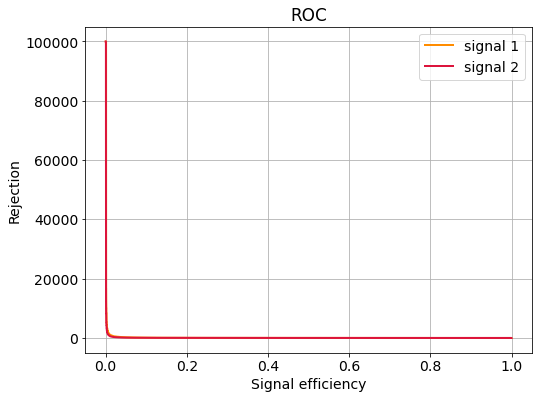

In [10]:
inverse_roc_plot(names=names, labels=labels, probs=scores, colors=colors)
plt.show()

### Significance

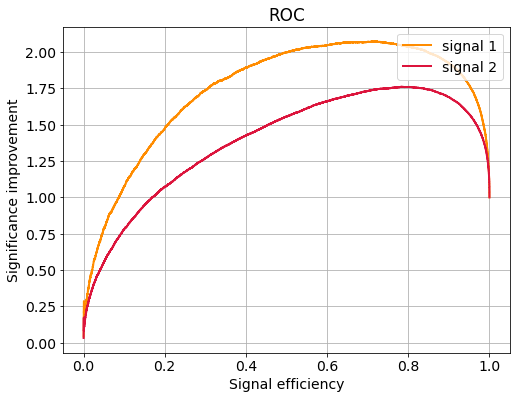

In [11]:
significance_plot(names=names, labels=labels, probs=scores, colors=colors)
plt.show()

### Precision vs. recall
This curve is better for data that is highly imbalanced

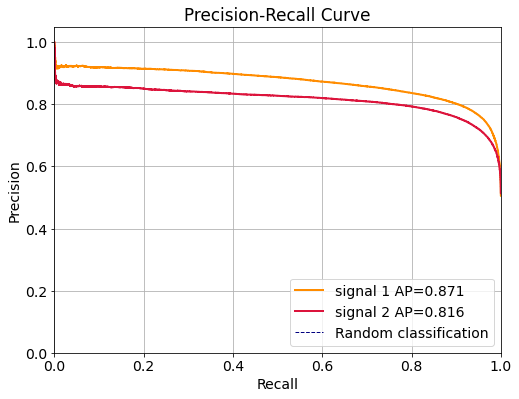

In [12]:
precision_recall_plot(names=names, labels=[df_sig1.loc[:,'label'], df_sig2.loc[:,'label']], probs=scores, colors=colors)
plt.show()

## Metrics
Here, I'll get the best thresholds for each signal and use them to calculate the metrics

In [13]:
from benchtools.src.metrictools import optimal_threshold, performance_metrics

In [14]:
threshold1 =optimal_threshold(labels[0], scores[0])
threshold2 =optimal_threshold(labels[1], scores[1])

print('Optimal thresholds: sig1 {0:.3}, sig2 {0:.3}'.format(threshold1, threshold2))

Optimal thresholds: sig1 0.706, sig2 0.706


In [15]:
df_sig1['y_pred']=(df_sig1['y_score'] >= threshold1).astype(float)
df_sig2['y_pred']=(df_sig2['y_score'] >= threshold2).astype(float)

log_cols=["Classifier", "Precision", "Recall", "F1 score"]
log = pd.DataFrame(columns=log_cols)

preds = [df_sig1.loc[:,'y_pred'], df_sig2.loc[:,'y_pred']]

for name, label, pred in zip(names, labels, preds):
    log_entry = performance_metrics(name, label, pred, pred_prob=None)
    log = log.append(log_entry)

log

signal 1
****Results****
              precision    recall  f1-score   support

  background       0.89      0.77      0.83    100000
      signal       0.80      0.91      0.85     98494

    accuracy                           0.84    198494
   macro avg       0.85      0.84      0.84    198494
weighted avg       0.85      0.84      0.84    198494

signal 2
****Results****
              precision    recall  f1-score   support

  background       0.87      0.73      0.79    100000
      signal       0.77      0.89      0.82     99077

    accuracy                           0.81    199077
   macro avg       0.82      0.81      0.81    199077
weighted avg       0.82      0.81      0.81    199077



,Classifier,Precision,Recall,F1 score
0,signal 1,79.813745,0.907558,0.849338
0,signal 2,76.532924,0.886381,0.821419
